<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [2]:
!pip install pandas

In [1]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2024-12-10 17:07:49--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  52.0MB/s    in 2.9s    

2024-12-10 17:07:52 (52.0 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



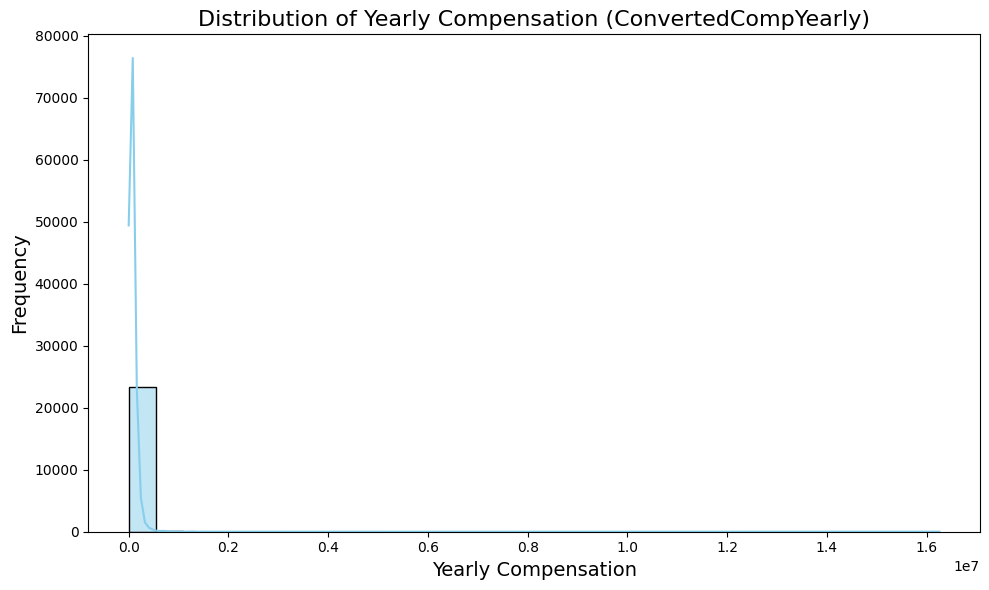

In [5]:
## Write your code here

import seaborn as sns
# Step 1: Clean the data by removing rows with missing values in 'ConvertedCompYearly'
df_cleaned = df.dropna(subset=['ConvertedCompYearly'])

# Step 2: Plot the histogram using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['ConvertedCompYearly'], bins=30, kde=True, color='skyblue')

# Step 3: Customize the plot
plt.title('Distribution of Yearly Compensation (ConvertedCompYearly)', fontsize=16)
plt.xlabel('Yearly Compensation', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



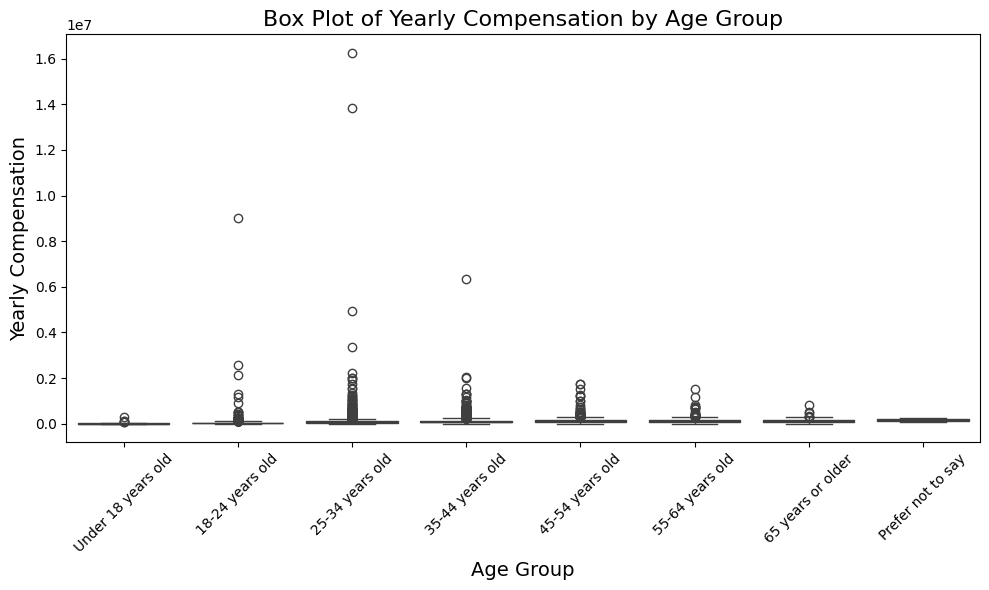

In [7]:
## Write your code here


# Define a mapping for age groups to numeric values
age_mapping = {
    'Under 18 years old': 0,
    '18-24 years old': 1,
    '25-34 years old': 2,
    '35-44 years old': 3,
    '45-54 years old': 4,
    '55-64 years old': 5,
    '65 years or older': 6,
    'Prefer not to say': 7
}

# Step 1: Use .loc to avoid SettingWithCopyWarning
df_cleaned.loc[:, 'AgeNumeric'] = df_cleaned['Age'].map(age_mapping)

# Step 2: Remove rows with missing 'ConvertedCompYearly' or 'AgeNumeric' values
df_cleaned = df_cleaned.dropna(subset=['ConvertedCompYearly', 'AgeNumeric'])

# Step 3: Create a box plot of ConvertedCompYearly vs AgeNumeric
plt.figure(figsize=(10, 6))
sns.boxplot(x='AgeNumeric', y='ConvertedCompYearly', data=df_cleaned)

# Step 4: Customize the plot
plt.title('Box Plot of Yearly Compensation by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Yearly Compensation', fontsize=14)
plt.xticks(ticks=range(len(age_mapping)), labels=age_mapping.keys(), rotation=45)

# Show the plot
plt.tight_layout()
plt.show()



### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



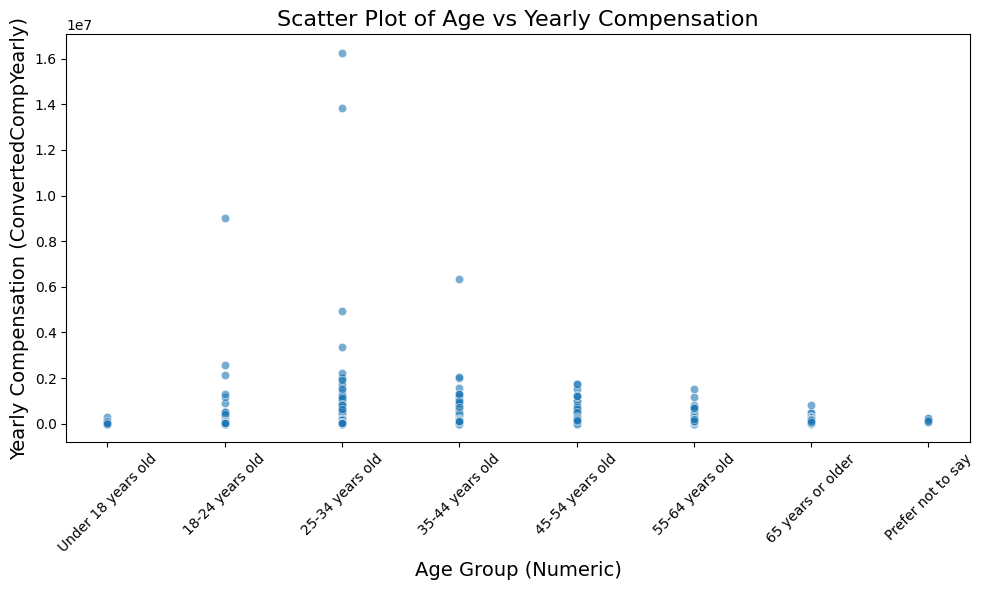

In [8]:
## Write your code here


# Scatter plot of Age_numeric vs ConvertedCompYearly
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AgeNumeric', y='ConvertedCompYearly', data=df_cleaned, alpha=0.6)

# Customize the plot
plt.title('Scatter Plot of Age vs Yearly Compensation', fontsize=16)
plt.xlabel('Age Group (Numeric)', fontsize=14)
plt.ylabel('Yearly Compensation (ConvertedCompYearly)', fontsize=14)

# Optional: Customize x-ticks to show original age categories
age_mapping = {
    0: 'Under 18 years old',
    1: '18-24 years old',
    2: '25-34 years old',
    3: '35-44 years old',
    4: '45-54 years old',
    5: '55-64 years old',
    6: '65 years or older',
    7: 'Prefer not to say'
}

plt.xticks(ticks=range(8), labels=age_mapping.values(), rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


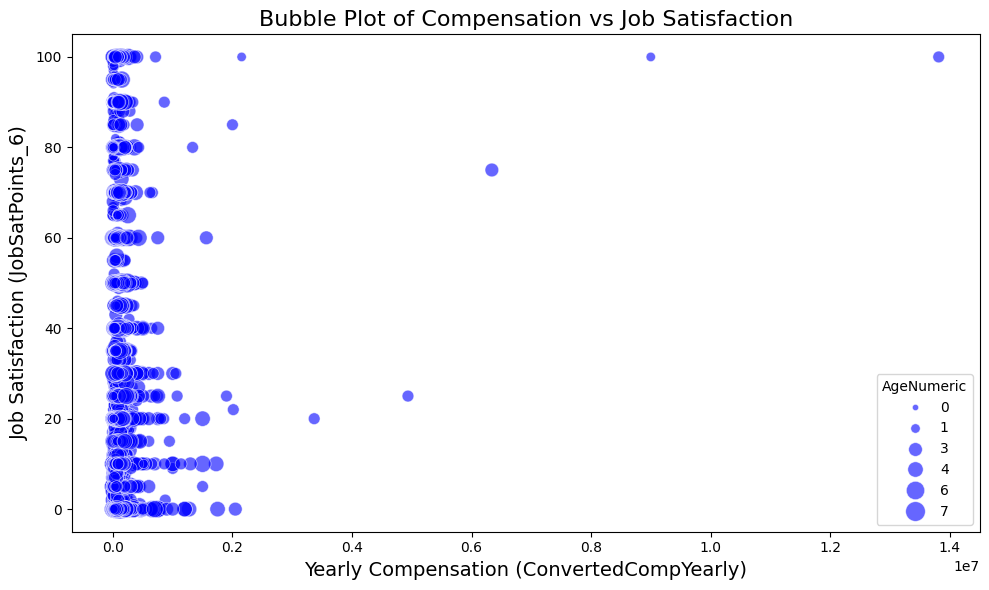

In [9]:
## Write your code here


# Bubble plot of ConvertedCompYearly vs JobSatPoints_6 with Age_numeric as bubble size
plt.figure(figsize=(10, 6))

# Scatter plot with bubble size representing Age_numeric
sns.scatterplot(
    x='ConvertedCompYearly', 
    y='JobSatPoints_6', 
    size='AgeNumeric', 
    data=df_cleaned, 
    alpha=0.6, 
    sizes=(20, 200),  # Adjust the size range of the bubbles
    color='blue'
)

# Customize the plot
plt.title('Bubble Plot of Compensation vs Job Satisfaction', fontsize=16)
plt.xlabel('Yearly Compensation (ConvertedCompYearly)', fontsize=14)
plt.ylabel('Job Satisfaction (JobSatPoints_6)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



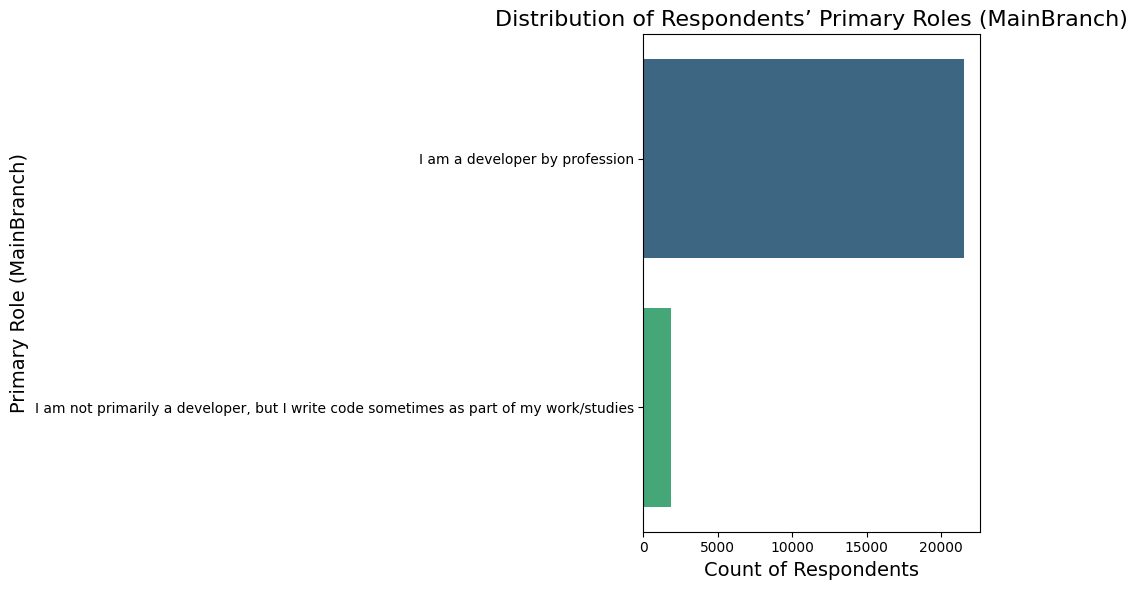

In [11]:
## Write your code here
import matplotlib.pyplot as plt




# Horizontal bar chart of MainBranch distribution
plt.figure(figsize=(10, 6))

# Plot the distribution of MainBranch
sns.countplot(
    y='MainBranch', 
    data=df_cleaned, 
    hue='MainBranch',  # Using hue to avoid the warning
    palette='viridis',  # Choose a color palette
    legend=False  # Disable the legend since it's not necessary
)

# Customize the plot
plt.title('Distribution of Respondents’ Primary Roles (MainBranch)', fontsize=16)
plt.xlabel('Count of Respondents', fontsize=14)
plt.ylabel('Primary Role (MainBranch)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()



##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



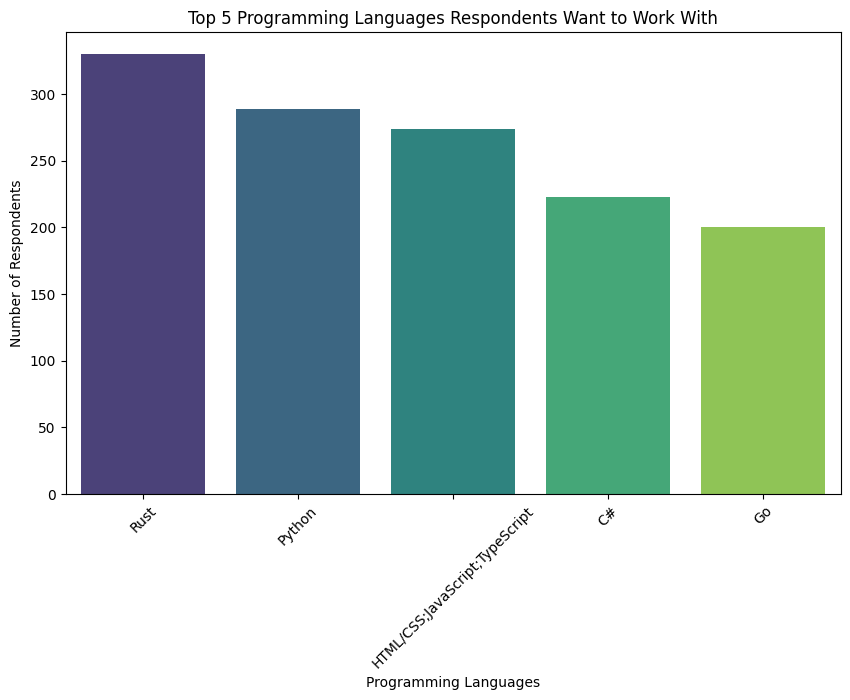

In [13]:
## Write your code here


# Assuming df_cleaned is your DataFrame and LanguageWantToWorkWith is the relevant column

# Count the occurrences of each programming language
language_counts = df_cleaned['LanguageWantToWorkWith'].value_counts().head(5)

# Create the vertical bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette='viridis', hue=language_counts.index)

# Customize the chart
plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.xlabel('Programming Languages')
plt.ylabel('Number of Respondents')

# Display the chart
plt.xticks(rotation=45)
plt.show()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


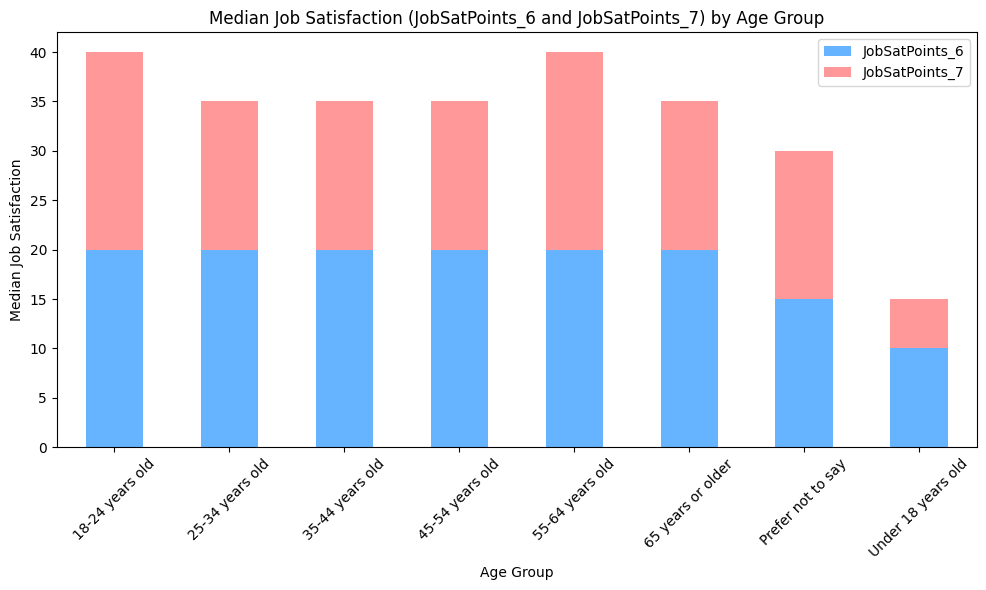

In [14]:
## Write your code here


# Assuming df_cleaned is your cleaned DataFrame with columns Age, JobSatPoints_6, and JobSatPoints_7

# Group by Age and calculate the median for JobSatPoints_6 and JobSatPoints_7
age_grouped = df_cleaned.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Plotting the stacked bar chart
age_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#66b3ff', '#ff9999'])

# Customize the chart
plt.title('Median Job Satisfaction (JobSatPoints_6 and JobSatPoints_7) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction')
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



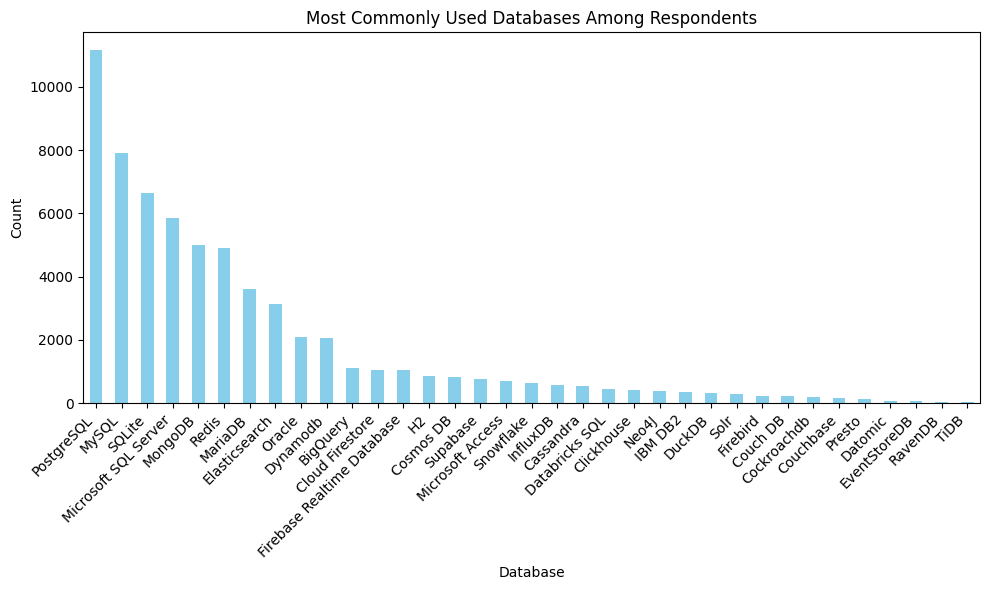

In [15]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_cleaned is your cleaned DataFrame with the column 'DatabaseHaveWorkedWith'

# Split the 'DatabaseHaveWorkedWith' column (if it's a string with multiple databases) into individual entries
# First, check for any missing or 'NaN' values in 'DatabaseHaveWorkedWith'
df_cleaned = df_cleaned.dropna(subset=['DatabaseHaveWorkedWith'])

# Split the 'DatabaseHaveWorkedWith' column into lists of databases (if not already)
databases = df_cleaned['DatabaseHaveWorkedWith'].str.split(';', expand=True).stack()

# Count the occurrences of each database
database_counts = databases.value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
database_counts.plot(kind='bar', color='skyblue')

# Customize the chart
plt.title('Most Commonly Used Databases Among Respondents')
plt.xlabel('Database')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



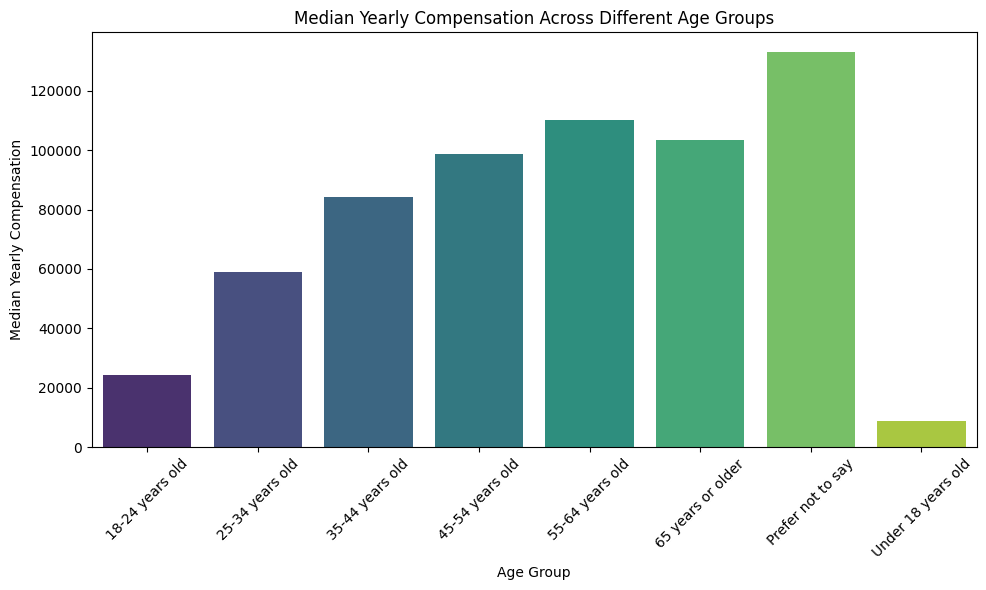

In [17]:
## Write your code here

# Create a grouped bar chart with hue
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='ConvertedCompYearly', data=age_compensation, hue='Age', palette='viridis')

# Customize the chart
plt.title('Median Yearly Compensation Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Median Yearly Compensation')
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()
plt.show()



##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



In [20]:
df_cleaned['Country'] = df_cleaned['Country'].str.strip()

# Extract unique countries after cleaning
unique_countries_cleaned = df_cleaned['Country'].unique()

# Display cleaned unique countries
unique_countries_cleaned

array(['Pakistan', 'Austria', 'Turkey', 'France',
       'United States of America',
       'United Kingdom of Great Britain and Northern Ireland', 'Bulgaria',
       'Greece', 'Brazil', 'Italy', 'Russian Federation', 'Germany',
       'South Africa', 'Canada', 'Iran, Islamic Republic of...',
       'Dominican Republic', 'Ukraine', 'Switzerland', 'Belgium', 'Peru',
       'Bolivia', 'Morocco', 'India', 'Luxembourg', 'Georgia',
       'Saudi Arabia', 'Ireland', 'Romania', 'Spain', 'Paraguay',
       'Lithuania', 'Netherlands', 'Slovenia',
       'Venezuela, Bolivarian Republic of...', 'Latvia', 'Sweden',
       'Costa Rica', 'Norway', 'Poland', 'Portugal', 'Finland', 'Israel',
       'Nicaragua', 'Cyprus', 'Czech Republic', 'Serbia', 'Croatia',
       'Hungary', 'Bangladesh', 'Indonesia', 'Denmark', 'Japan',
       'Bosnia and Herzegovina', 'Mexico', 'Philippines', 'Thailand',
       'Slovakia', 'El Salvador', 'Ecuador', 'Argentina', 'Algeria',
       'Kazakhstan', 'Malaysia', 'Zimbabwe

/tmp/ipykernel_4408/3357388446.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


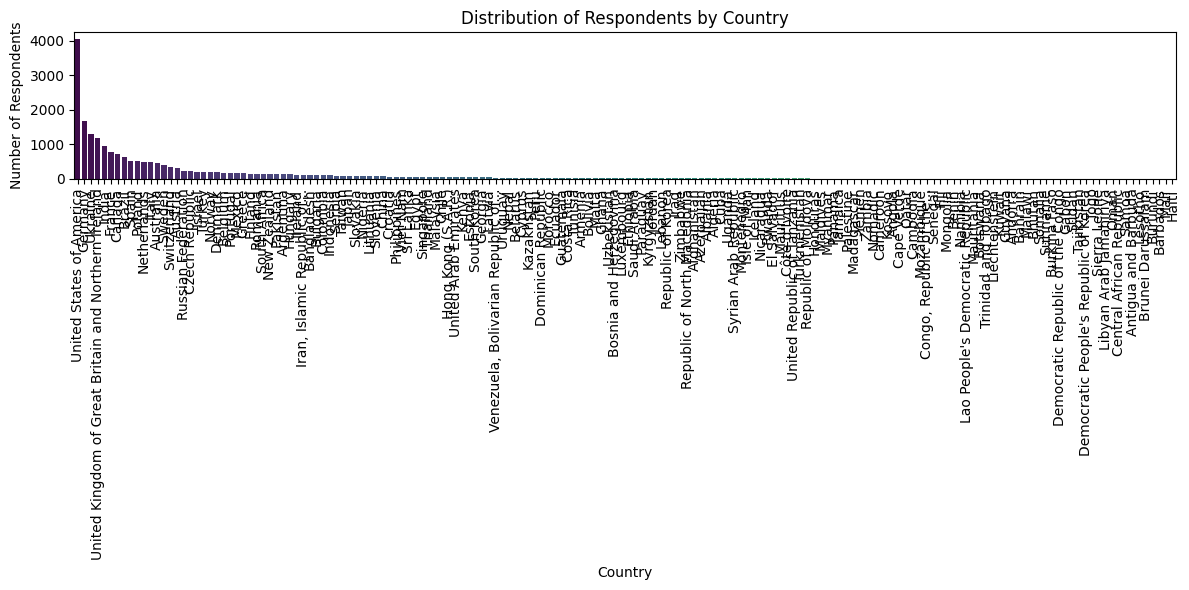

In [24]:
#Count the number of respondents per country
country_counts = df_cleaned['Country'].value_counts()

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Respondents by Country')

# Rotate x-axis labels if needed for readability
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
